# 如何给灯光数据定标？

🐋 友情提醒：
1. 本项目数据较大，运行前请挂载 work 目录（步骤图[在此](https://www.heywhale.com/org/meteoda/task/62ef6c35c9b80359bec78f2a/forum/62ef7f2aa4bc7520c7ccd0e8)）。
2. 编程界面里的超链接建议在新标签页打开。

> 卫星数据不是完美的，掌握一定的预处理技巧，可以让我们更好地进行数据分析。

在过去几十年里，城市不断发展，面积不断扩张。如何清晰直观地展示城市发展的轨迹？——夜间灯光数据可以来帮忙。

当夜幕降临，**卫星能捕捉到我们地球表面的城市灯光，而夜间灯光能反映人类活动的强度**。研究表明，夜间灯光与能源消费、人口密度、GDP 和二氧化碳排放等强相关，因此我们可以**借助卫星数据来刻画城市发展过程**。

常用的夜间灯光数据是由传感器 DMSP-OLS 采集的。然而，由于该传感器自身的局限，卫星数据在星际、年际缺乏连续性，不能直接进行对比。那么，当我们需要制作上海城市扩张GIF图时，该怎么做？

本期 workshop 中，我们将学习如何通过交叉定标(cross calibration)提升 4 颗卫星数据的连续性，之后，基于定标的夜光数据，制作1992 年至 2013 年城市发展GIF图。

**作业**中，你需要应用学习到的技能，对制作不同城市的 GIF 图（必做），以及对比不同的模型，提高定标效果（选做）。

希望借由本次案例学习与作业练习，**帮助你初步了解如何使用 Python 实现卫星定标**这一重要预处理技能。

## 背景介绍：关于卫星定标的小知识

这里引用一些公开资料，方便非地理专业背景的同学理解什么是定标。

来自地球观测卫星的数据越来越多地支撑着政府的报告、评估和决策以及重要的全球问题，如可持续发展目标，包括气候变化和土地退化。最终用户需要相信这些数据的来源和质量是可靠和准确的。[^1]

在实际的观测过程中，受到气溶胶、云等大气问题、卫星系统影响，卫星捕捉到的信号与地面实际情况与差别，产生了观测偏差。

因此，来自不同卫星的数据，或同一卫星在不同日期之间收集的数据，能够被无缝使用和准确比较，以便有效利用地球观测数据，保持数据档案的科学价值，并满足严格的监管或法律约束。

定标就是把**卫星观测的数据定到标准值**，确保它们捕获的数据与物理标准一致。简单来说，相当于给卫星观测这杆“秤”加上准星。[^2]

本案例中主要使用的定标方法为交叉定标[^3]，即当待标定的在轨卫星传感器与定标结果很好的在轨卫星传感器同时观测同一目标时，用标定结果很好的在轨卫星传感器来标定待标定的卫星传感器[^4]。

[^1]: 澳大利亚联邦科学与工业研究组织《[卫星定标和检验](https://www.csiro.au/en/research/technology-space/astronomy-space/calval)》
[^2]: 中国气象报《[【科普阅读】什么是卫星辐射定标？](http://politics.people.com.cn/n/2014/0823/c70731-25524624.html)》
[^3]: 本案例所用数据源已经经过筛选、处理的产品，受大气问题影响较小，所以重点考虑卫星系统的偏差。
[^4]: 百度名片《[交叉辐射定标](https://baike.baidu.com/item/%E4%BA%A4%E5%8F%89%E8%BE%90%E5%B0%84%E5%AE%9A%E6%A0%87/7486439)》

## 案例介绍：使用交叉定标，提升 DMSP-OLS 夜间灯光数据的连续性

理想情况下，夜间灯光能够反映经济发展程度，也就是经济越发达，基础照明设施就越多，灯光就越亮。但实际情况是，由于DMSP-OLS[^1]本身缺乏星上定标设备，它的数据在星际、年际无法直接进行对比，导致原始数据的全球灯光总量并不是随着GDP的增加而增加。我们需要对数据进行校正，提升数据的连续性。

我们采用《[A Stepwise Calibration of Global DMSP/OLS Stable Nighttime Light Data (1992–2013)](https://www.mdpi.com/2072-4292/9/6/637)》 这篇文章的交叉定标方法来校正数据[^2]（非常感谢作者Xuecao Li、Yuyu Zhou提出的宝贵方法）。本项目内容依据本文进行展开。建议你在运行本项目之前最好阅读该论文。

![Image Name](./pic/rfq0ksao9n.png)

[^1]: 美国国防气象卫星（Defense Meteorological Satellite Program, DMSP）搭载的业务型线扫描传感器（Operational Linescan System, OLS）最初主要为气象监测而设计，用于探测月光照射下的云，后来由于其独特的光电放大能力使其能在夜间探测到地表微弱的近红外辐射,因此,该传感器获取的夜间灯光影像被越来越多的用来研究人类活动（来自曹子阳, 吴志峰, 匡耀求, 黄宁生《[DMSP/OLS夜间灯光影像中国区域的校正及应用](http://www.dqxxkx.cn/CN/lexeme/showArticleByLexeme.do?articleID=36978)》）

[^2]: 为什么我选择这篇论文来复现给大家学习？一是有别于传统的一个统一的校正函数，针对不同的卫星，它用了不同的校正函数，更灵活；二是不需要传统的、复杂筛选样本的过程，做法更便捷、高效，效果也不错，对新同学更好上手。


夜间灯光与人类的经济发展有密切的联系。全球的经济在过去几十年中持续发展，生产总值(GDP)不断增加，如**Figure 3**所示：

![Image Name](./pic/rfq0jawxfl.png)

*图片来源：[世界银行](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2013&start=1992&view=chart)

##  方法概述

全球DMSP/OLS的灯光亮度总和(Sum of NTL，SNTL)并没有像GDP那样持续增长，而是在星际和年际不连续，如**Figure 5**所示。卫星F10、F12和F14的灯光总量SNTL各自呈现上升趋势。然而，其余三颗卫星（F15、F16 和 F18）没有明显的上升趋势。

该论文开发了一套逐步校正方案。该方案包括四个步骤： 
1. 系统校正F14； 
2. 分期校正F15； 
3. 校正F16；
4. 校正F182010（F18卫星的2010年数据）。

这种逐步校正能够分别改善每颗卫星的不连续问题。每个步骤将在以下小节中详细描述。

![Image Name](./pic/rfq0lfd7yu.jpg)

在学习、理解案例的过程中，希望你**重点关注一些问题**：

- 定标时，选择哪一个图像作为参考图像？
- 如何判断哪些年份、哪颗卫星的数据需要进行校正？是校正整颗卫星还是部分年份的数据？
- 如何使用 Python 确定数据的地理格网(grid)？即：如何确定图的左上角、右下角

## 1. 预处理：准备数据

In [ ]:
# 安装完成后，欢迎点右上角Kernel-保存当前镜像，以便以后直接使用该自定义镜像
!pip install retry pySmartDL -i https://pypi.douban.com/simple/ #从指定镜像下载安装工具包，镜像URL可自行修改

In [1]:
# 导入需要的拓展包
from IPython.core.display import display, HTML
import tarfile  
import os
import gzip  
import shutil
import glob
from tqdm import tqdm
import gc
import gdal
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from retry import retry
import pandas as pd
from PIL import Image
import imageio
import IPython
from pySmartDL import SmartDL

### 1.1. 解压数据

有6颗卫星(F10、F12、F14、F15、F16、F18)搭载了DMSP-OLS传感器，它们数据的时间跨度是1992至2013年。如 Figure 1 所示，不同年份有不同卫星采集的数据，有的年份有多颗卫星的数据。我们可以从[NOAA网站](https://ngdc.noaa.gov/eog/dmsp/downloadV4composites.html)下载这些数据。为了节约时间，我们已经提前下载好了这些数据。我们需要做的就是解压这些数据，就能得到全球的灯光图像。


![Image Name](./pic/rfq05jk3yd.png)



In [2]:
# 定义函数：解压文件
@retry()
def gunzip_shutil(source_filepath, block_size=65536):
    # 解压gz文件，提取tif图像
    dest_filepath = source_filepath[:-3]
    with gzip.open(source_filepath, 'rb') as s_file, \
            open(dest_filepath, 'wb') as d_file:
        shutil.copyfileobj(s_file, d_file, block_size)

In [ ]:
# 本cell由于数据量较大所以运行耗时较长
# 指定压缩文件gz的目录
inpDir = "dataset/"
# 获取所有压缩文件gz的文件名
gzFiles = glob.glob(inpDir+"*.gz")
gzFiles.sort()
# 依次遍历原始压缩文件gz
for gz in tqdm(gzFiles):
    # 从压缩文件gz中提取出stable_lights.avg_vis文件，该文件是tif格式的图像
    gunzip_shutil(gz)

print('全部解压成功！')

### 1.2. 裁剪数据

为了能在短时间内高效完成 demo 案例的运行、学习，我们将范围缩小到以中国东部地区为中心的范围[^1]，因此我们需要将全球范围的数据进行裁剪。如 **Figure 2** 所示，该区域表示为黄框。其左上角位于第2433行，第34070列；其右下角位于第6971行，第28082列。

![Image Name](./pic/rfq0guqg13.png)

[^1]: 这样对算力的要求也更低。

我们需要依次读取这些图像，并把相应的区域提取出来保存成新的tif文件。

In [3]:
# 定义函数：读取tif图像成numpy array
@retry()
def readTiff(filename:str):
    ds = gdal.Open(filename)
    image = ds.GetRasterBand(1).ReadAsArray()
    return image,ds.GetProjection(),ds.GetGeoTransform()

@retry()
# 定义函数：根据坐标裁剪子区域
def clipImg(image,proj,geotrans,upperLeftCoords,downRightCoords):
    # 根据坐标提取子矩阵
    r_upperLeft,c_upperLeft = upperLeftCoords
    r_downRight,c_downRight = downRightCoords
    subImage = image[r_upperLeft:r_downRight,c_upperLeft:c_downRight]
    # 设置投影信息
    subProj = proj
    # 设置坐标
    subGeotrans = list(geotrans)
    #图像左上角的坐标为r_upperLeft，c_upperLeft。则该点的经纬度为：
    xGeo = geotrans[0] + c_upperLeft * geotrans[1] + r_upperLeft * geotrans[2]
    yGeo = geotrans[3] + c_upperLeft * geotrans[4] + r_upperLeft * geotrans[5]
    # 左上角经度
    subGeotrans[0] = xGeo
    # 左上角纬度
    subGeotrans[3] = yGeo
    # 垂直空间分辨率(经度间隔)
    subGeotrans[1] = subGeotrans[1]
    # 水平空间分辨率(纬度间隔)
    subGeotrans[5] = subGeotrans[5]
    subGeotrans = tuple(subGeotrans)
    # 
    return subImage,subProj,subGeotrans

@retry()
# 定义函数：保存到磁盘
def outTiff(subArr,subProj,subGeotrans,outputFile):
    # 创建driver
    driver = gdal.GetDriverByName("GTiff")
    # 创建数据集
    outdata = driver.Create(outputFile, subArr.shape[1], subArr.shape[0], 1, gdal.GDT_Float32)
    # 把数组放进数据集
    outdata.GetRasterBand(1).WriteArray(subArr)
    # 设置投影信息和坐标
    outdata.SetProjection(subProj) 
    outdata.SetGeoTransform(subGeotrans)
    # 
    outdata.FlushCache()
    outdata = None
    driver=None
    subArr=None
    #print('outTiff: {0}'.format(outputFile))

In [4]:
# 找到所有文件名
globalImgs = glob.glob('dataset/*tif')
globalImgs.sort()
# 定义输出路径
# 需提前挂载work目录
outDir = 'result/2. clipped dataset/'
if not os.path.isdir(outDir):
    os.mkdir(outDir)
# 遍历所有文件
for fn in tqdm(globalImgs):
    # 读取数据
    image,proj,trans = readTiff(fn)
    # 裁剪图像
    subImage,subProj,subGeotrans = clipImg(image,proj,trans,(2433, 34070),(6971,38082))
    del image
    _ = gc.collect()
    # 输出到磁盘
    bn = os.path.basename(fn)
    outFn = outDir + bn
    outTiff(subImage,subProj,subGeotrans,outFn)
    del subImage
    _ = gc.collect()
    # 为了节省空间，删除全球图像
    os.remove(fn)

0it [00:00, ?it/s]


## 2. 逐步校正

### 2.2. 第一步: 校正F14

F10和F12的灯光总量持续增长，展现住了很好的连续性，并且在1994年的几乎保持相等。因此假设F10和F12的灯光总量趋势是合理的，因此我们需要调整F14的灯光总量，使其与F10、F12保持连续的趋势。

F14自身的灯光总量趋势是合理的，但相对其他卫星来说，存在低估现象，如上图中黄色椭圆部分所示。这种不一致可能归因于卫星系统差异，可以进行系统校正。考虑到F12和F14在1997年、1998年和1999年都有重叠，我们使用二次多项式模型来建立这两颗卫星之间的关系，可以表示为如下形式：

$$
DN_{ref} = w_{2}DN^{2} + w_{1}DN^{1} + w_{0}
$$


其中：
- $DNref$ 表示 F12 卫星的像元
- $DN$ 表示 F14 卫星的像元。
- $w_{0}$、$w_{1}$ 和 $w_{2}$ 是模型的三个系数。

接下来，我们将根据以上公式，对F14进行校正，分为模型拟合和校正两步。

### 2.2.1. 模型拟合

首先，我们需要读取两颗卫星的数据成两个一维数组，以方便进行后续的模型拟合。

In [5]:
# 定义函数：将多个numpy array合并成一个长array
@retry()
def concat(listArr:"a list of 2d array",flatten:bool=True):
    arrConcat = np.concatenate(listArr,axis=0)
    if flatten:
        return arrConcat.flatten()
    return arrConcat

In [6]:
# 图像路径
fnF121997 = glob.glob('result/2. clipped dataset/'+'*F121997*tif')[0]
fnF121998 = glob.glob('result/2. clipped dataset/'+'*F121998*tif')[0]
fnF121999 = glob.glob('result/2. clipped dataset/'+'*F121999*tif')[0]
fnF141997 = glob.glob('result/2. clipped dataset/'+'*F141997*tif')[0]
fnF141998 = glob.glob('result/2. clipped dataset/'+'*F141998*tif')[0]
fnF141999 = glob.glob('result/2. clipped dataset/'+'*F141999*tif')[0]
# 读取F12的图像
arrF121997 = readTiff(fnF121997)[0]
print('{0} has been read.'.format('arrF121997'))
arrF121998 = readTiff(fnF121998)[0]
print('{0} has been read.'.format('arrF121998'))
arrF121999 = readTiff(fnF121999)[0]
print('{0} has been read.'.format('arrF121999'))
# 把arrF121997、arrF121998、arrF121999合并成一维数组
arrF12 = concat([arrF121997,arrF121998,arrF121999])
print('arrF121997,arrF121998,arrF121999 has been concated')
del arrF121997,arrF121998,arrF121999
_ = gc.collect()
# 把arrF141997、arrF141998、arrF141999合并成一维数组
arrF141997 = readTiff(fnF141997)[0]
print('{0} has been read.'.format('arrF141997'))
arrF141998 = readTiff(fnF141998)[0]
print('{0} has been read.'.format('arrF141998'))
arrF141999 = readTiff(fnF141999)[0]
print('{0} has been read.'.format('arrF141999'))
# 把arrF141997、arrF141998、arrF141999合并成一维数组
arrF14 = concat([arrF141997,arrF141998,arrF141999])
print('arrF141997,arrF141998,arrF141999 has been concated')
del arrF141997,arrF141998,arrF141999
_ = gc.collect()

arrF121997 has been read.
arrF121998 has been read.
arrF121999 has been read.
arrF121997,arrF121998,arrF121999 has been concated
arrF141997 has been read.
arrF141998 has been read.
arrF141999 has been read.
arrF141997,arrF141998,arrF141999 has been concated


接下来，以F12为参考图像，F14为待定标图像。通过二次多项式拟合两个卫星之间的关系。

In [7]:
# 定义函数：计算模型的决定系数R2
@retry()
def R2(paras,x,yTrue):
    #
    model = np.poly1d(paras)
    yPred = model(x)
    R2 = 1 - np.sum((yTrue - yPred)**2) / np.sum((yTrue - np.mean(yTrue))**2)
    return R2

# 定义函数：通过二次多项式拟合参考图像refArr与待定标图像waitArr之间的关系
#@retry()
def fitParameter(waitArr,refArr,xlabel='F14',ylabel='F12'):
    # 定义亮像元的掩膜mask，它指示参考图像和待定标图像中都亮的区域
    mask0 = waitArr>0
    mask1 = refArr>0
    mask = mask0 * mask1
    del mask0,mask1
    _ = gc.collect()
    # 应用mask
    x = waitArr[mask==1.]
    y = refArr[mask==1.]
    del mask
    _ = gc.collect()
    # 用二次多项式拟合参考图像和待定标图像之间的关系
    paras = np.polyfit(x, y, 2)
    # 绘图显示
    ## 点
    plt.figure(figsize=(5,5))
    from matplotlib.colors import LogNorm
    _ = plt.hist2d(x,y, bins=200, norm=LogNorm())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ## 线 
    line  = []
    for i in range(64):
        line.append(np.poly1d(paras)(i))
    plt.plot(list(range(64)),line,'-')
    ## 参数
    plt.text(70, 10, 'w2={0}\n\nw1={1}\n\nw0={2}'.format(paras[0],paras[1],paras[2]))
    r_sq = R2(paras,x,y)
    plt.text(70, 4, 'R2={0}'.format(r_sq))
    del x,y
    _ = gc.collect()
    # 返回参数和R2
    return paras,r_sq

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


parameters: [0.00964711 0.48680182 5.28645081]
R2: 0.9085130915045738


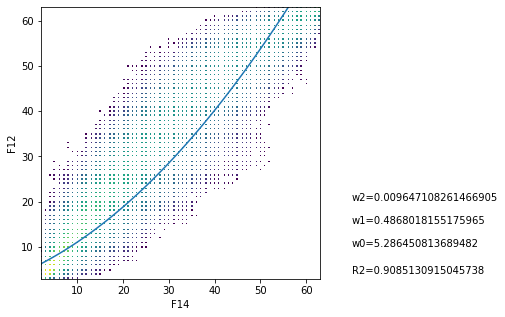

In [8]:
waitArr = arrF14
refArr = arrF12
paras,r_sq = fitParameter(waitArr,refArr)
print('parameters: {0}'.format(paras))
print('R2: {0}'.format(r_sq))
del waitArr,refArr,arrF14,arrF12
_ = gc.collect()

从上图输出结果看，R^2 接近 0.91，还可以[^1]。
[^1]: 一般超过 0.8 就可以认为校正结果不错了。

### 2.2.2. 校正

现在我们已经得到了校正F14的二次多项式参数w2、w1、w0，接下来，我们应用该函数对F14的图像进行校正，这个过程被成为定标(calibration)。然后输出到磁盘。

In [9]:
# 定义函数：根据拟合的参数对待定标图像进行定标
def calibrate(waitArr,paras):
    model = np.poly1d(paras)
    waitArr[waitArr!=0.] = model(waitArr[waitArr!=0.])
    waitArr[waitArr<0.] = 0.
    waitArr[waitArr>63.] = 63.
    return waitArr

# 定义函数：输出图像
def outTif(arr,outFn,proj,trans):
    # 创建driver
    nrow = arr.shape[0]
    ncol = arr.shape[1]
    driver = gdal.GetDriverByName("GTiff")
    outdata = driver.Create(outFn,ncol,nrow,1, gdal.GDT_Float32)
    outband = outdata.GetRasterBand(1)
    # 写出数组
    outband.WriteArray(arr)
    # 添加地理参考
    im_proj = proj
    im_geotrans = trans
    outdata.SetGeoTransform(im_geotrans)
    outdata.SetProjection(im_proj)
    driver = None
    outdata = None
    outband = None

In [10]:
# 创建定标图像的输出路径
calibratedDir = 'result/3. calibrated dataset/'
if not os.path.isdir(calibratedDir):
    os.mkdir(calibratedDir)

# 收集F14所有的图像
F14s = ['F141997','F141998','F141999','F142000','F142001','F142002','F142003']

# 遍历每一幅图像
for F14xxxx in F14s:
    # 读取图像，对其进行定标
    fnF14xxxx = glob.glob('result/2. clipped dataset/' + '*' + F14xxxx + '*tif')[0]
    arrF14xxxx,proj,trans = readTiff(fnF14xxxx)
    arrF14xxxx = calibrate(arrF14xxxx,paras)
    # 将定标的F14xxxx图像输出
    outFn = calibratedDir + os.path.basename(fnF14xxxx)
    outTif(arrF14xxxx,outFn,proj,trans)
    print('{0} has been output'.format(outFn))
    del arrF14xxxx
    _ = gc.collect()

result/3. calibrated dataset/F141997.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F141998.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F141999.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F142000.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F142001.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F142002.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F142003.v4b_web.stable_lights.avg_vis.tif has been output


目前，我们已经将F14卫星每一年定标的图像放进了 ** /3. calibrated dataset/ ** 。由于F10和F12卫星的数据是无需校正的，为了方便后续的调用，我们将F10和F12卫星的数据拷贝到** /3. calibrated dataset/ ** 下面。

In [11]:
# 找到所有F10卫星的图像
F10s = glob.glob('result/2. clipped dataset/' + 'F10*tif')
F10s.sort()
# 找到所有F12卫星的图像
F12s = glob.glob('result/2. clipped dataset/' + 'F12*tif')
F12s.sort()
# 依次拷贝到/3. calibrated dataset/下面
for f1nxxxx in tqdm(F10s + F12s):
    shutil.copy(f1nxxxx,  'result/3. calibrated dataset/'+os.path.basename(f1nxxxx))

100%|██████████| 9/9 [00:04<00:00,  2.25it/s]


接下来，为了可视化定标的效果，我们把F10、F12、F14卫星的定标以前的数据（位于** /2. clipped dataset/ ** 下）的灯光总和绘制出来，与定标以后的数据（位于** /3. calibrated dataset** 下）的灯光总和进行对比。

In [12]:
# 定义函数：灯光亮度求和
def sumNTL(arr):
    sumNTL = np.sum(arr)
    return sumNTL

# 定义函数：创建dataframe以保存灯光总和值
def createDF():
    df = pd.DataFrame({"F10":[np.NAN for i in range(1992,2014)],
                       "F12":[np.NAN for i in range(1992,2014)],
                       "F14":[np.NAN for i in range(1992,2014)],
                       "F15":[np.NAN for i in range(1992,2014)],
                       "F16":[np.NAN for i in range(1992,2014)],
                       "F18":[np.NAN for i in range(1992,2014)],},index=range(1992,2014))
    return df

In [13]:
# 统计F10、F12、F14卫星的定标以前的数据（位于/2. clipped dataset/下）的灯光总和
dfSum_beforeCalibration = createDF()
# 遍历每一张图，进行求和计算
fnF10xxxx = glob.glob('result/2. clipped dataset/F10*tif')
fnF12xxxx = glob.glob('result/2. clipped dataset/F12*tif')
fnF14xxxx = glob.glob('result/2. clipped dataset/F14*tif')
for fn in fnF10xxxx + fnF12xxxx + fnF14xxxx:
    # 读取图像计算总和
    arr = readTiff(fn)[0]
    sumValue = sumNTL(arr)
    # 保存到dataframe的相应位置
    fnn = os.path.basename(fn)[0:3]
    xxxx = int(os.path.basename(fn)[3:7])
    dfSum_beforeCalibration.loc[xxxx,fnn] = sumValue
    del arr
    gc.collect()

In [14]:
# 统计F10、F12、F14卫星的定标以后的数据（位于/3. calibrated dataset/下）的灯光总和
dfSum_afterCalibration = createDF()
# 遍历每一张图，进行求和计算
fnF10xxxx = glob.glob('result/3. calibrated dataset/F10*tif')
fnF12xxxx = glob.glob('result/3. calibrated dataset/F12*tif')
fnF14xxxx = glob.glob('result/3. calibrated dataset/F14*tif')
for fn in fnF10xxxx + fnF12xxxx + fnF14xxxx:
    # 读取图像计算总和
    arr = readTiff(fn)[0]
    sumValue = sumNTL(arr)
    # 保存到dataframe的相应位置
    fnn = os.path.basename(fn)[0:3]
    xxxx = int(os.path.basename(fn)[3:7])
    dfSum_afterCalibration.loc[xxxx,fnn] = sumValue
    del arr
    gc.collect()

<AxesSubplot:title={'center':'sum of light values !AFTER! calibration'}>

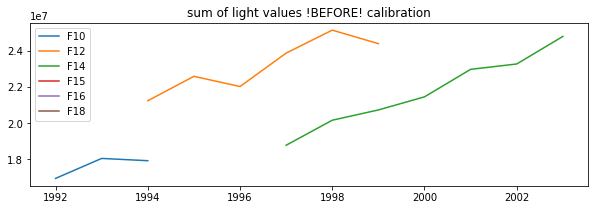

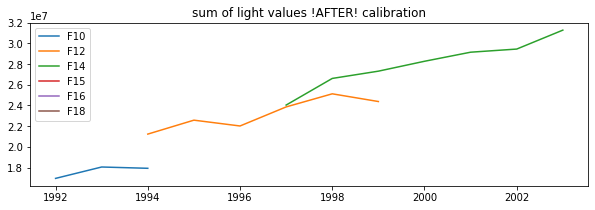

In [15]:
dfSum_beforeCalibration.plot(kind='line',figsize=[10,3],title='sum of light values !BEFORE! calibration')
dfSum_afterCalibration.plot(kind='line',figsize=[10,3],title='sum of light values !AFTER! calibration')

通过上图对比可知，定标之后的灯光总量，相比于之前，F10、F12、F14连续性显著提升，与这一地区的经济发展趋势相符。

### 2.3. 第二步: 校正F15

接下来我们对F15卫星的数据进行校正。通过观察上面的**Figure 4**可以发现，F15卫星的2000、2001、2002年数据与之前的卫星的趋势是一致的，因此我们认为该卫星的这三年数据是正确的。然而从2003年开始，F15卫星的灯光总量陡然降低（如 **Figure 4** 的紫色椭圆所示），趋势与之前不符，这可能是2003年之后该卫星退化，出现了明显的系统误差，因此我们需要对F15的这部分数据进行校正。

我们使用之前**已经校正的**F142003的所有亮像素作为参考，以F152003的所有亮像素作为待定标图像，仍然使用二次多项式进行建立两者之间的定标关系。

#### 2.3.1. 模型拟合

In [16]:
# 图像路径
fnF142003 = glob.glob('result/3. calibrated dataset/'+'*F142003*tif')[0]
fnF152003 = glob.glob('result/2. clipped dataset/'+'*F152003*tif')[0]
# 读取F142003的图像
arrF142003 = readTiff(fnF142003)[0]
# 把F142003数组展成一维数组
arrF142003 = concat([arrF142003])
# 读取F152003的图像
arrF152003 = readTiff(fnF152003)[0]
# 把F152003数组展成一维数组
arrF152003 = concat([arrF152003])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


parameters: [0.00941815 0.49648862 6.13129568]
R2: 0.9481293857097626


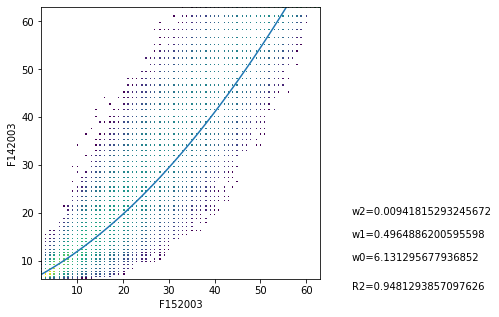

In [17]:
waitArr = arrF152003
refArr = arrF142003
paras,r_sq = fitParameter(waitArr,refArr,xlabel='F152003',ylabel='F142003')
print('parameters: {0}'.format(paras))
print('R2: {0}'.format(r_sq))
del waitArr,refArr,arrF152003,arrF142003
_ = gc.collect()

#### 2.3.2. 校正

在得到针对F15卫星的模型参数之后，我们把该模型应用到F15卫星的从2003年到2007年的数据上，如此可以完成对F15卫星的定标。

In [18]:
# 输出路径
calibratedDir = 'result/3. calibrated dataset/'
if not os.path.isdir(calibratedDir):
    os.mkdir(calibratedDir)

# 收集F14所有的图像
F15s = ['F152003','F152004','F152005','F152006','F152007']

# 遍历每一幅图像
for F15xxxx in F15s:
    # 读取图像，对其进行定标
    fnF15xxxx = glob.glob('result/2. clipped dataset/' + '*' + F15xxxx + '*tif')[0]
    arrF15xxxx,proj,trans = readTiff(fnF15xxxx)
    arrF15xxxx = calibrate(arrF15xxxx,paras)
    # 将定标的F15xxxx图像输出
    outFn = calibratedDir + os.path.basename(fnF15xxxx)
    outTif(arrF15xxxx,outFn,proj,trans)
    print('{0} has been output'.format(outFn))
    del arrF15xxxx
    _ = gc.collect()

result/3. calibrated dataset/F152003.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F152004.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F152005.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F152006.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F152007.v4b_web.stable_lights.avg_vis.tif has been output


目前，我们已经将校正的F15卫星2003年至2007年的图像放进了** /3. calibrated dataset/ **。由于F15卫星2000年至2002年的数据是无需校正的，为了方便后续的调用，我们将F15卫星2000年至2002年的数据拷贝到** /3. calibrated dataset/ **下面。

In [19]:
# 找到所有F15卫星的图像
F15s =  glob.glob('result/2. clipped dataset/' + 'F152000*tif')+ \
        glob.glob('result/2. clipped dataset/' + 'F152001*tif')+ \
        glob.glob('result/2. clipped dataset/' + 'F152002*tif')
F15s.sort()
# 依次拷贝到/3. calibrated dataset/下面
for f1nxxxx in tqdm(F15s):
    shutil.copy(f1nxxxx,  'result/3. calibrated dataset/'+os.path.basename(f1nxxxx))

100%|██████████| 3/3 [00:01<00:00,  2.75it/s]


接下来，我们再次使用可视化的方式查看定标效果。我们把F10、F12、F14、F15卫星的定标以前的数据（位于** /2. clipped dataset/** 下）的灯光总和绘制出来，与定标以后的数据（位于** /3. calibrated dataset/ **下）的灯光总和进行对比。

In [20]:
# 统计F10、F12、F14、F15卫星的定标以前的数据（位于/2. clipped dataset/下）的灯光总和
dfSum_beforeCalibration = createDF()
# 遍历每一张图，进行求和计算
fnF10xxxx = glob.glob('result/2. clipped dataset/F10*tif')
fnF12xxxx = glob.glob('result/2. clipped dataset/F12*tif')
fnF14xxxx = glob.glob('result/2. clipped dataset/F14*tif')
fnF15xxxx = glob.glob('result/2. clipped dataset/F15*tif')
for fn in fnF10xxxx + fnF12xxxx + fnF14xxxx+ fnF15xxxx:
    # 读取图像计算总和
    arr = readTiff(fn)[0]
    sumValue = sumNTL(arr)
    # 保存到dataframe的相应位置
    fnn = os.path.basename(fn)[0:3]
    xxxx = int(os.path.basename(fn)[3:7])
    dfSum_beforeCalibration.loc[xxxx,fnn] = sumValue
    del arr
    gc.collect()

In [21]:
# 统计F10、F12、F14卫星的定标以后的数据（位于/3. calibrated dataset/下）的灯光总和
dfSum_afterCalibration = createDF()
# 遍历每一张图，进行求和计算
fnF10xxxx = glob.glob('result/3. calibrated dataset/F10*tif')
fnF12xxxx = glob.glob('result/3. calibrated dataset/F12*tif')
fnF14xxxx = glob.glob('result/3. calibrated dataset/F14*tif')
fnF15xxxx = glob.glob('result/3. calibrated dataset/F15*tif')
for fn in fnF10xxxx + fnF12xxxx + fnF14xxxx + fnF15xxxx:
    # 读取图像计算总和
    arr = readTiff(fn)[0]
    sumValue = sumNTL(arr)
    # 保存到dataframe的相应位置
    fnn = os.path.basename(fn)[0:3]
    xxxx = int(os.path.basename(fn)[3:7])
    dfSum_afterCalibration.loc[xxxx,fnn] = sumValue
    del arr
    gc.collect()

<AxesSubplot:title={'center':'sum of light values !AFTER! calibration'}>

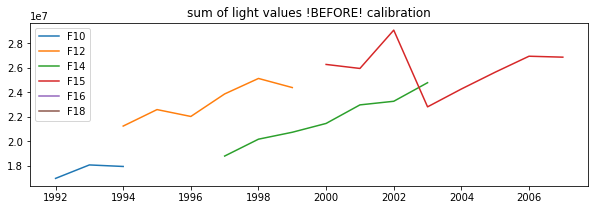

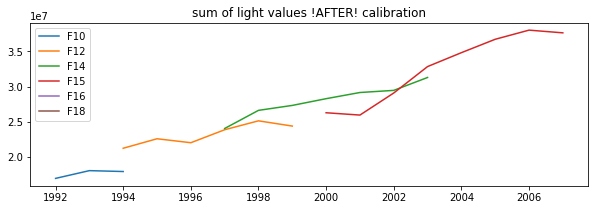

In [22]:
dfSum_beforeCalibration.plot(kind='line',figsize=[10,3],title='sum of light values !BEFORE! calibration')
dfSum_afterCalibration.plot(kind='line',figsize=[10,3],title='sum of light values !AFTER! calibration')

通过上图对比可知，定标之后的灯光总量，相比于之前，F10、F12、F14、F15连续性显著提升，与这一地区的经济发展趋势相符。

### 2.4. 第三步: 校正F16

接下来我们对F16进行系统校正。本节我们简化了原文中的操作。我们采用F15卫星2005年的数据作为参考图像，F16卫星的2005年的数据作为待定标图像，拟合二次多项式。

#### 2.4.1. 模型拟合

In [23]:
# 图像路径
fnF152005 = glob.glob('result/3. calibrated dataset/'+'*F152005*tif')[0]
fnF162005 = glob.glob('result/2. clipped dataset/'+'*F162005*tif')[0]
# 读取F152005的图像
arrF152005 = readTiff(fnF152005)[0]
# 把F152005数组展成一维数组
arrF152005 = concat([arrF152005])
# 读取F162005的图像
arrF162005 = readTiff(fnF162005)[0]
# 把F162005数组展成一维数组
arrF162005 = concat([arrF162005])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


parameters: [0.00863814 0.47204778 6.30313554]
R2: 0.9603672511875629


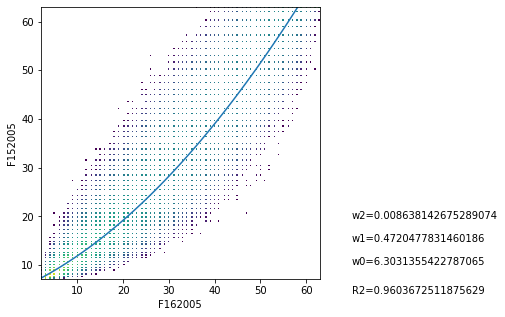

In [24]:
waitArr = arrF162005
refArr = arrF152005
paras,r_sq = fitParameter(waitArr,refArr,xlabel='F162005',ylabel='F152005')
print('parameters: {0}'.format(paras))
print('R2: {0}'.format(r_sq))
del waitArr,refArr,arrF162005,arrF152005
_ = gc.collect()

#### 2.4.2. 校正

接下来，应用拟合的参数，对F16每一年的数据进行系统性校正。

In [25]:
calibratedDir = 'result/3. calibrated dataset/'
if not os.path.isdir(calibratedDir):
    os.mkdir(calibratedDir)

# 收集F14所有的图像
F16s = ['F162004','F162005','F162006','F162007','F162008','F162009']

# 遍历每一幅图像
for F16xxxx in F16s:
    # 读取图像，对其进行定标
    fnF16xxxx = glob.glob('result/2. clipped dataset/' + '*' + F16xxxx + '*tif')[0]
    arrF16xxxx,proj,trans = readTiff(fnF16xxxx)
    arrF16xxxx = calibrate(arrF16xxxx,paras)
    # 将定标的F16xxxx图像输出
    outFn = calibratedDir + os.path.basename(fnF16xxxx)
    outTif(arrF16xxxx,outFn,proj,trans)
    print('{0} has been output'.format(outFn))
    del arrF16xxxx
    _ = gc.collect()

result/3. calibrated dataset/F162004.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F162005.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F162006.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F162007.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F162008.v4b_web.stable_lights.avg_vis.tif has been output
result/3. calibrated dataset/F162009.v4b_web.stable_lights.avg_vis.tif has been output


接下来进行可视化展示。

In [26]:
# 统计F10、F12、F14、F15、F16卫星的定标以前的数据（位于/2. clipped dataset/下）的灯光总和
dfSum_beforeCalibration = createDF()
# 遍历每一张图，进行求和计算
fnF10xxxx = glob.glob('result/2. clipped dataset/F10*tif')
fnF12xxxx = glob.glob('result/2. clipped dataset/F12*tif')
fnF14xxxx = glob.glob('result/2. clipped dataset/F14*tif')
fnF15xxxx = glob.glob('result/2. clipped dataset/F15*tif')
fnF16xxxx = glob.glob('result/2. clipped dataset/F16*tif')
for fn in fnF10xxxx + fnF12xxxx + fnF14xxxx+ fnF15xxxx+ fnF16xxxx:
    # 读取图像计算总和
    arr = readTiff(fn)[0]
    sumValue = sumNTL(arr)
    # 保存到dataframe的相应位置
    fnn = os.path.basename(fn)[0:3]
    xxxx = int(os.path.basename(fn)[3:7])
    dfSum_beforeCalibration.loc[xxxx,fnn] = sumValue
    del arr
    gc.collect()

In [27]:
# 统计F10、F12、F14、F15、F16卫星的定标以后的数据（位于/3. calibrated dataset/下）的灯光总和
dfSum_afterCalibration = createDF()
# 遍历每一张图，进行求和计算
fnF10xxxx = glob.glob('result/3. calibrated dataset/F10*tif')
fnF12xxxx = glob.glob('result/3. calibrated dataset/F12*tif')
fnF14xxxx = glob.glob('result/3. calibrated dataset/F14*tif')
fnF15xxxx = glob.glob('result/3. calibrated dataset/F15*tif')
fnF16xxxx = glob.glob('result/3. calibrated dataset/F16*tif')
for fn in fnF10xxxx + fnF12xxxx + fnF14xxxx + fnF15xxxx+ fnF16xxxx:
    # 读取图像计算总和
    arr = readTiff(fn)[0]
    sumValue = sumNTL(arr)
    # 保存到dataframe的相应位置
    fnn = os.path.basename(fn)[0:3]
    xxxx = int(os.path.basename(fn)[3:7])
    dfSum_afterCalibration.loc[xxxx,fnn] = sumValue
    del arr
    gc.collect()

<AxesSubplot:title={'center':'sum of light values !AFTER! calibration'}>

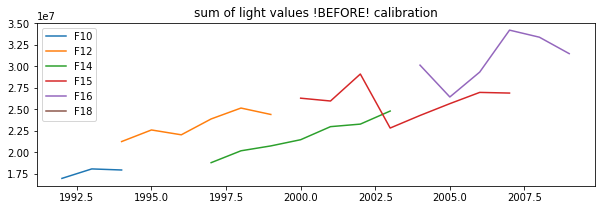

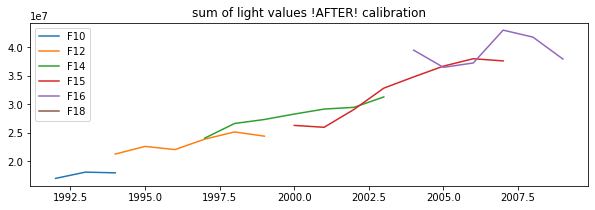

In [28]:
dfSum_beforeCalibration.plot(kind='line',figsize=[10,3],title='sum of light values !BEFORE! calibration')
dfSum_afterCalibration.plot(kind='line',figsize=[10,3],title='sum of light values !AFTER! calibration')

可以看出，相比之前，F10、F12、F14、F15、F16的连续性得到增强。

### 2.5. 第四步: 校正F182010


在F18卫星的数据中，2010年的数据的灯光总和异常高，如**Figure 4**中的蓝色圆圈所示。F18卫星的其他年份数据与其他卫星的趋势一致。因此我们只需要对这一年的数据进行校正。考虑到2010年只有一幅图像，我们使用校正的F16卫星的2009年数据作为参考，以此调整F182010。

#### 2.5.1. 模型拟合

In [29]:
# 图像路径
fnF162009 = glob.glob('result/3. calibrated dataset/'+'*F162009*tif')[0]
fnF182010 = glob.glob('result/2. clipped dataset/'+'*F182010*tif')[0]
# 读取F162009的图像
arrF162009 = readTiff(fnF162009)[0]
# 把F162009数组展成一维数组
arrF162009 = concat([arrF162009])
# 读取F182010的图像
arrF182010 = readTiff(fnF182010)[0]
# 把F182010数组展成一维数组
arrF182010 = concat([arrF182010])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


parameters: [0.00711127 0.34203734 5.3320811 ]
R2: 0.9080354273319244


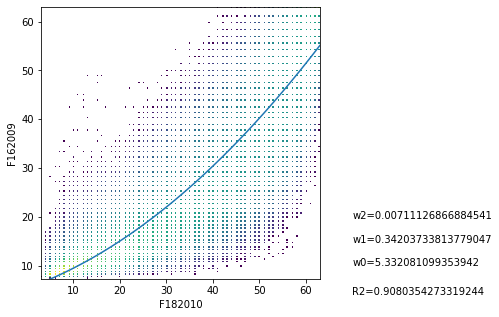

In [30]:
waitArr = arrF182010
refArr = arrF162009
paras,r_sq = fitParameter(waitArr,refArr,xlabel='F182010',ylabel='F162009')
print('parameters: {0}'.format(paras))
print('R2: {0}'.format(r_sq))
del waitArr,refArr,arrF182010,arrF162009
_ = gc.collect()

#### 2.5.2. 校正

校正F182010。

In [31]:
# 输出路径
calibratedDir = 'result/3. calibrated dataset/'
if not os.path.isdir(calibratedDir):
    os.mkdir(calibratedDir)

# 读取图像，对其进行定标
fnF182010 = glob.glob('result/2. clipped dataset/' + '*F182010*tif')[0]
arrF182010,proj,trans = readTiff(fnF182010)
arrF182010 = calibrate(arrF182010,paras)
# 将定标的F182010图像输出
outFn = calibratedDir + os.path.basename(fnF182010)
outTif(arrF182010,outFn,proj,trans)
print('{0} has been output'.format(outFn))
del arrF182010
_ = gc.collect()

result/3. calibrated dataset/F182010.v4d_web.stable_lights.avg_vis.tif has been output


类似的，将18卫星其他年份的数据拷贝到** /3. calibrated dataset/ **下

In [32]:
# 找到所有F18卫星的图像
F18s =  glob.glob('result/2. clipped dataset/' + 'F182011*tif')+ \
        glob.glob('result/2. clipped dataset/' + 'F182012*tif')+ \
        glob.glob('result/2. clipped dataset/' + 'F182013*tif')
F18s.sort()
# 依次拷贝到/3. calibrated dataset/下面
for f1nxxxx in tqdm(F18s):
    shutil.copy(f1nxxxx,  'result/3. calibrated dataset/'+os.path.basename(f1nxxxx))

100%|██████████| 3/3 [00:01<00:00,  2.62it/s]


可视化最终的定标效果。

In [33]:
# 统计F10、F12、F14、F15、F18卫星的定标以前的数据（位于/2. clipped dataset/下）的灯光总和
dfSum_beforeCalibration = createDF()
# 遍历每一张图，进行求和计算
fnF10xxxx = glob.glob('result/2. clipped dataset/F10*tif')
fnF12xxxx = glob.glob('result/2. clipped dataset/F12*tif')
fnF14xxxx = glob.glob('result/2. clipped dataset/F14*tif')
fnF15xxxx = glob.glob('result/2. clipped dataset/F15*tif')
fnF16xxxx = glob.glob('result/2. clipped dataset/F16*tif')
fnF18xxxx = glob.glob('result/2. clipped dataset/F18*tif')
for fn in fnF10xxxx + fnF12xxxx + fnF14xxxx+ fnF15xxxx+ fnF16xxxx+ fnF18xxxx:
    # 读取图像计算总和
    arr = readTiff(fn)[0]
    sumValue = sumNTL(arr)
    # 保存到dataframe的相应位置
    fnn = os.path.basename(fn)[0:3]
    xxxx = int(os.path.basename(fn)[3:7])
    dfSum_beforeCalibration.loc[xxxx,fnn] = sumValue
    del arr
    gc.collect()

In [34]:
# 统计F10、F12、F14、F15、F16、F18卫星的定标以后的数据（位于/3. calibrated dataset/下）的灯光总和
dfSum_afterCalibration = createDF()
# 遍历每一张图，进行求和计算
fnF10xxxx = glob.glob('result/3. calibrated dataset/F10*tif')
fnF12xxxx = glob.glob('result/3. calibrated dataset/F12*tif')
fnF14xxxx = glob.glob('result/3. calibrated dataset/F14*tif')
fnF15xxxx = glob.glob('result/3. calibrated dataset/F15*tif')
fnF16xxxx = glob.glob('result/3. calibrated dataset/F16*tif')
fnF18xxxx = glob.glob('result/3. calibrated dataset/F18*tif')
for fn in fnF10xxxx + fnF12xxxx + fnF14xxxx + fnF15xxxx+ fnF16xxxx+ fnF18xxxx:
    # 读取图像计算总和
    arr = readTiff(fn)[0]
    sumValue = sumNTL(arr)
    # 保存到dataframe的相应位置
    fnn = os.path.basename(fn)[0:3]
    xxxx = int(os.path.basename(fn)[3:7])
    dfSum_afterCalibration.loc[xxxx,fnn] = sumValue
    del arr
    gc.collect()

<AxesSubplot:title={'center':'sum of light values !AFTER! calibration'}>

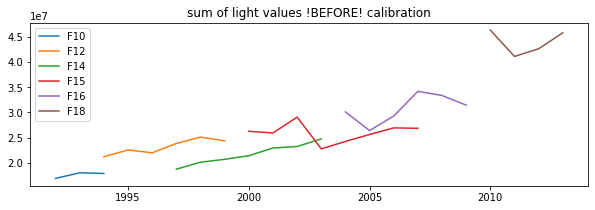

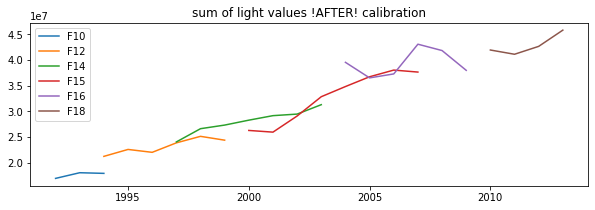

In [35]:
dfSum_beforeCalibration.plot(kind='line',figsize=[10,3],title='sum of light values !BEFORE! calibration')
dfSum_afterCalibration.plot(kind='line',figsize=[10,3],title='sum of light values !AFTER! calibration')

最终，我们完成了所有年份的灯光数据校正。如上图所示，定标之后，从1992年到2013年，灯光总和持续增长，相比之前，连续性明显提升。

## 3. 制作城市发展轨迹图

灯光数据能够刻画城市的范围。定标的灯光数据有很好的年际连续性，因此可以通过定标的灯光数据展现城市发展的轨迹。本节，我们通过定标的灯光数据，制作北京、上海、广州及其周边区域的城市发展轨迹图。这三个城市及其周边区域的坐标如 **Figure 6** 所示。

![Image Name](./pic/rfq0v32y7s.png)


### 3.1. 将每个城市及其周边区域的每年图像导出成png格式文件

In [36]:
_ = gc.collect()

In [37]:
# 选择以下数据制作动态图
fnnxxxxs = ['F101992','F101993','F101994',
            'F121995','F121996','F121997','F121998',
            'F141999','F142000','F142001','F142002',
            'F152003','F152004','F152005','F152006',
            'F162007','F162008','F162009',
            'F182010','F182011','F182012','F182013']

首先，我们要生成三个城市及其周边区域的每年图像，并保存成png格式。

In [38]:
# 定义函数：创建每年的png图片
def createPNG(arr,outFn):
    fig = plt.figure(figsize=(20,20))
    plt.imshow(arr,vmin=0, vmax=63)
    plt.savefig(outFn)
    plt.close(fig)
    del fig
    _ = gc.collect()

In [40]:
# 创建路径
outDir = "result/4. gif/"
if not os.path.isdir(outDir):
    os.mkdir(outDir)

# 定义城市及其周边区域的坐标(完成基础作业只需要改变下面的注释内容即可)
cities_coords = {'Shanghai':[(2757,2012),(2919,2190)]}
#cities_coords = {'Beijing':[(1760,1412),(1840,1576)]}
#cities_coords = {'Guangzhou':[(3723,1033),(3943,1269)]}

# 遍历每个城市及其周边区域，输出每年的图像
for city,coord in cities_coords.items():
    # 遍历定标的每一年的图像
    for fnnxxxx in tqdm(fnnxxxxs):
        # 读取数据
        fullname_fnnxxxx = glob.glob('result/3. calibrated dataset/'+'*'+fnnxxxx+'*tif')[0]
        arr,proj,trans = readTiff(fullname_fnnxxxx)
        # 裁剪图像
        subArr,subProj,subTrans = clipImg(arr,proj,trans,coord[0],coord[1])
        del arr
        _ = gc.collect()
        # 输出图像
        sub_outDir = outDir + city + '/'
        if not os.path.isdir(sub_outDir):
            os.mkdir(sub_outDir)
        createPNG(subArr,sub_outDir + os.path.basename(fnnxxxx))
        del subArr
        _ = gc.collect()

100%|██████████| 22/22 [00:13<00:00,  1.60it/s]


### 3.2. 制作GIF图

In [41]:
# 定义函数：根据每年的png图片，创建gif图片
def create_gif(dirCity, gif_name):
    image_list = glob.glob(dirCity+'*png')
    image_list.sort()
    #
    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name, frames, 'GIF', duration = 0.2)
    return

In [42]:
# 为每个城市创建gif图片
for city in ['Shanghai']:
    dir_city = 'result/4. gif/' + city + '/'
    gif_name = 'result/4. gif/' + city + '.gif'
    create_gif(dir_city, gif_name)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


此时，在 /home/mw/work/4. gif 下面，已经产生了相应的城市发展gif动图，你可以右键该文件，点击下载，保存到自己的电脑上。

In [ ]:
from IPython.display import Image
Image(open('result/4. gif/Shanghai.gif','rb').read())